In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [112]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [151]:
data = pd.read_csv("Internet.csv", encoding='gb2312')
data

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,全国总计,53578.7,5223.7,50550.6,5136.2,46408.3,3585.4,3458.6,2818.6,37808.2,15770.5,NaN
1,东部地区,22948.5,1999.5,21436.2,1999.3,19353.0,1035.2,1924.4,1624.0,16264.8,6683.8,56371.7119
2,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
3,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
4,河北,2796.9,262.5,2666.9,303.9,2335.9,130.7,177.2,166.9,1664.1,1132.8,7461.0235
5,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895
6,江苏,4071.6,314.8,3767.8,305.3,3220.5,38.9,511.4,394.5,2510.9,1560.7,8474.8016
7,浙江,3117.0,178.2,2838.6,145.7,2621.0,46.0,275.5,219.8,2191.8,925.3,6456.7588
8,福建,1985.1,154.1,1841.4,151.9,1785.6,213.2,62.0,59.9,1383.8,601.4,4154.0086
9,山东,3863.7,418.1,3656.8,454.0,3516.4,334.7,242.1,239.9,2736.1,1127.6,10152.7453


In [114]:
# data.loc[(data['地区'] == '东部地区' or data['地区'] == '中部地区' or data['地区'] == '西部地区' or data['地区'] == '东部地区')]

data_all = pd.concat([data.loc[data['地区'] == district] for district in ['全国总计', '东部地区', '中部地区', '西部地区', '东北地区']], ignore_index=True)
data_all

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,全国总计,53578.7,5223.7,50550.6,5136.2,46408.3,3585.4,3458.6,2818.6,37808.2,15770.5,NaN
1,东部地区,22948.5,1999.5,21436.2,1999.3,19353.0,1035.2,1924.4,1624.0,16264.8,6683.8,56371.7119
2,中部地区,13296.5,1366.6,12672.2,1328.7,11905.2,1123.5,611.2,554.8,9140.1,4156.4,36469.4362
3,西部地区,14121.0,1516.7,13400.2,1472.3,12190.0,1084.3,888.5,607.9,9661.6,4459.4,38285.2295
4,东北地区,3212.7,340.9,3042.0,335.9,2960.1,342.4,34.5,31.8,2741.8,470.9,9851.4948


In [134]:
avg1 = [data.loc[i]['2021年宽带接入'] / data.loc[i]['人口数'] for i in [1, 2, 3, 4]]
avg1

[0.4070924800138986,
 0.3682896365269506,
 0.42153441556254584,
 0.37486813973980915]

In [135]:
avg2 = [data.loc[i]['2021年100M-1000M'] / data.loc[i]['人口数'] for i in [1, 2, 3, 4]]
avg2

[0.3433104893874972,
 0.32270448741943525,
 0.36023343126345875,
 0.31308037027359586]

In [137]:
avg3 = [data.loc[i]['大于1000M2021年 '] / data.loc[i]['人口数'] for i in [1, 2, 3, 4]]
avg3

[0.03413768954566732,
 0.029004578840954195,
 0.04940138146455841,
 0.023750092731915397]

In [152]:
data = data.drop([0, 1, 12, 19, 32])
data = data.reset_index(drop=True)
data

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
1,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
2,河北,2796.9,262.5,2666.9,303.9,2335.9,130.7,177.2,166.9,1664.1,1132.8,7461.0235
3,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895
4,江苏,4071.6,314.8,3767.8,305.3,3220.5,38.9,511.4,394.5,2510.9,1560.7,8474.8016
5,浙江,3117.0,178.2,2838.6,145.7,2621.0,46.0,275.5,219.8,2191.8,925.3,6456.7588
6,福建,1985.1,154.1,1841.4,151.9,1785.6,213.2,62.0,59.9,1383.8,601.4,4154.0086
7,山东,3863.7,418.1,3656.8,454.0,3516.4,334.7,242.1,239.9,2736.1,1127.6,10152.7453
8,广东,4277.7,387.7,3950.0,362.7,3509.2,99.1,364.1,326.4,3243.7,1034.1,12601.2510
9,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232


In [116]:
data1 = data.sort_values(by=['2021年宽带接入'])
data1

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
22,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2,364.8100
25,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2,592.3957
26,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2,720.2654
9,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232
1,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
29,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
16,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
0,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
3,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895
30,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,830.8,182.7,3185.0088


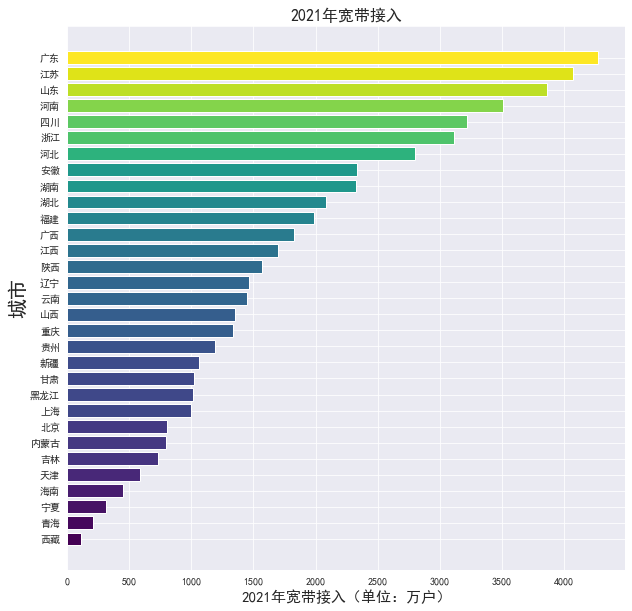

In [117]:
lst = list(data1['2021年宽带接入'])
lst1 = list(data1['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年宽带接入（单位：万户）', fontdict={'size':15})
plt.title('2021年宽带接入', fontdict={'size':16})
plt.show()

In [154]:
data11 = data.copy()
data11['2021年宽带接入'] = data11['2021年宽带接入'] / data11['人口数']
data11 = data11.sort_values(by=['2021年宽带接入'])
data11

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
29,吉林,0.304983,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
21,云南,0.307545,173.8,1348.8,174.3,1307.5,153.8,44.0,40.6,989.4,462.6,4720.9277
20,贵州,0.307919,185.0,1047.1,134.9,1084.5,170.8,32.6,29.1,815.2,372.2,3856.2148
22,西藏,0.316055,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2,364.8100
30,黑龙江,0.318209,127.2,935.8,111.6,953.5,126.6,7.9,7.4,830.8,182.7,3185.0088
16,内蒙古,0.331072,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
8,广东,0.339466,387.7,3950.0,362.7,3509.2,99.1,364.1,326.4,3243.7,1034.1,12601.2510
28,辽宁,0.343943,133.7,1416.4,139.2,1344.6,130.5,23.2,21.3,1295.9,169.1,4259.1407
15,湖南,0.349613,209.8,2165.0,212.0,2004.6,244.1,66.3,58.3,1546.3,776.7,6644.4864
13,河南,0.352819,414.9,3370.9,385.8,3221.9,183.7,246.1,222.0,2508.0,997.8,9936.5519


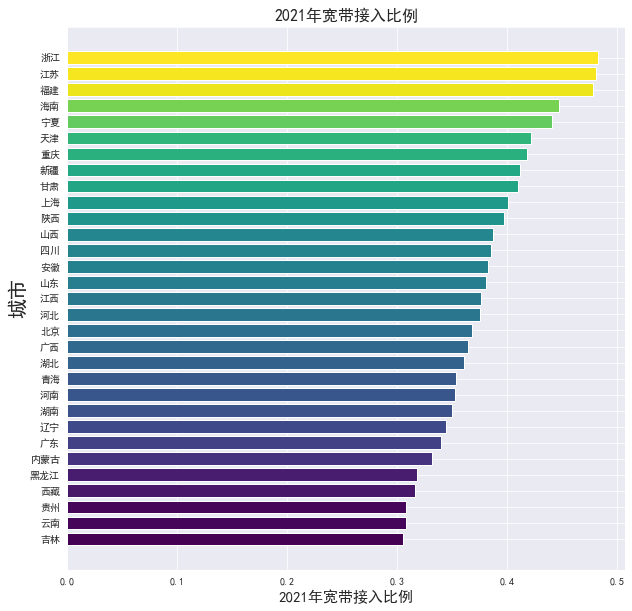

In [160]:
lst = list(data11['2021年宽带接入'])
lst1 = list(data11['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年宽带接入比例', fontdict={'size':15})
plt.title('2021年宽带接入比例', fontdict={'size':16})
plt.show()

In [118]:
data2 = data.sort_values(by='2021年FTTH/0用户').reset_index(drop=True)
data2

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2,364.8100
1,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2,592.3957
2,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2,720.2654
3,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232
4,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
5,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
6,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
7,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
8,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,830.8,182.7,3185.0088
9,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895


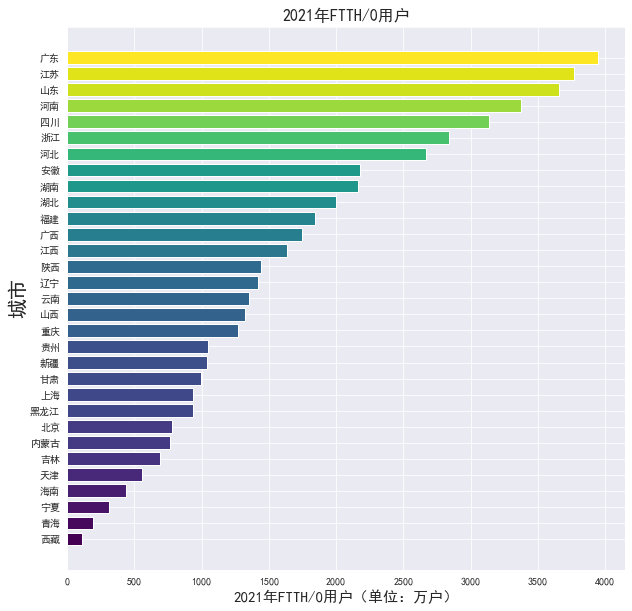

In [119]:
lst = list(data2['2021年FTTH/0用户'])
lst1 = list(data2['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年FTTH/0用户（单位：万户）', fontdict={'size':15})
plt.title('2021年FTTH/0用户', fontdict={'size':16})
plt.show()

In [120]:
data3 = data.sort_values(by='2021年100M-1000M').reset_index(drop=True)
data3

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2,364.8100
1,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2,592.3957
2,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2,720.2654
3,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232
4,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
5,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
6,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
7,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
8,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895
9,甘肃,1025.2,93.8,993.8,97.0,881.2,39.8,75.9,55.3,661.3,364.0,2501.9831


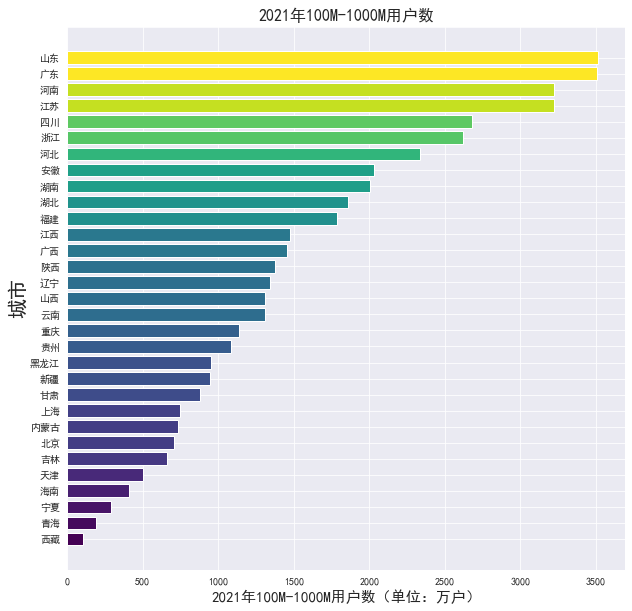

In [121]:
lst = list(data3['2021年100M-1000M'])
lst1 = list(data3['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年100M-1000M用户数（单位：万户）', fontdict={'size':15})
plt.title('2021年100M-1000M用户数', fontdict={'size':16})
plt.show()

In [157]:
data33 = data.copy()
data33['2021年100M-1000M'] = data33['2021年100M-1000M'] / data33['人口数']
data33 = data33.sort_values(by=['2021年100M-1000M'])
data33

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
29,吉林,734.2,80.0,689.8,85.0,0.275033,85.3,3.4,3.2,615.1,119.1,2407.3453
21,云南,1451.9,173.8,1348.8,174.3,0.276958,153.8,44.0,40.6,989.4,462.6,4720.9277
8,广东,4277.7,387.7,3950.0,362.7,0.278480,99.1,364.1,326.4,3243.7,1034.1,12601.2510
20,贵州,1187.4,185.0,1047.1,134.9,0.281234,170.8,32.6,29.1,815.2,372.2,3856.2148
17,广西,1827.4,176.6,1743.0,168.1,0.290583,121.4,290.5,144.7,1043.9,783.6,5012.6804
22,西藏,115.3,19.0,112.8,19.7,0.291385,21.0,1.2,1.1,78.2,37.2,364.8100
30,黑龙江,1013.5,127.2,935.8,111.6,0.299371,126.6,7.9,7.4,830.8,182.7,3185.0088
3,上海,995.4,76.5,938.7,76.7,0.301155,150.6,31.8,103.3,988.6,6.9,2487.0895
15,湖南,2323.0,209.8,2165.0,212.0,0.301694,244.1,66.3,58.3,1546.3,776.7,6644.4864
16,内蒙古,796.2,73.3,762.5,73.2,0.304335,53.6,15.6,14.1,701.5,94.7,2404.9155


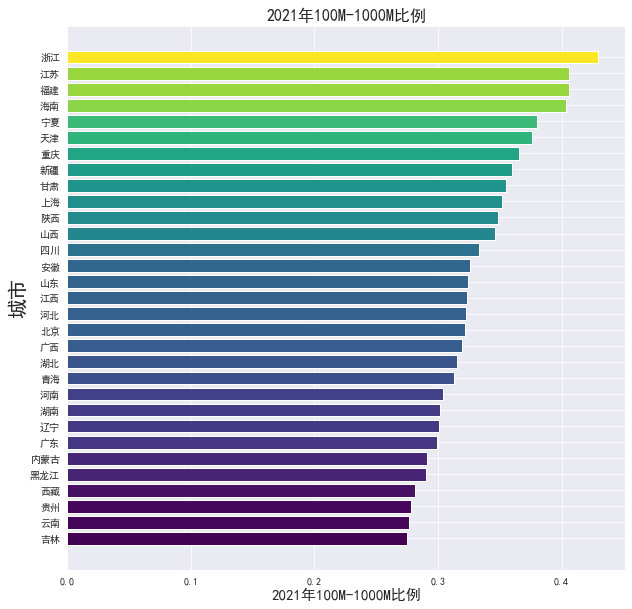

In [159]:
lst = list(data33['2021年100M-1000M'])
lst1 = list(data11['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年100M-1000M比例', fontdict={'size':15})
plt.title('2021年100M-1000M比例', fontdict={'size':16})
plt.show()

In [122]:
data4 = data.sort_values(by='大于1000M2021年 ').reset_index(drop=True)
data4

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2,364.8100
1,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
2,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,830.8,182.7,3185.0088
3,山西,1350.4,98.3,1321.5,95.1,1312.0,139.6,8.2,6.3,1098.4,252.0,3491.5616
4,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232
5,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2,592.3957
6,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
7,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2,720.2654
8,辽宁,1464.9,133.7,1416.4,139.2,1344.6,130.5,23.2,21.3,1295.9,169.1,4259.1407
9,新疆,1064.2,180.3,1041.9,184.8,945.9,172.4,28.3,25.1,761.4,302.8,2585.2345


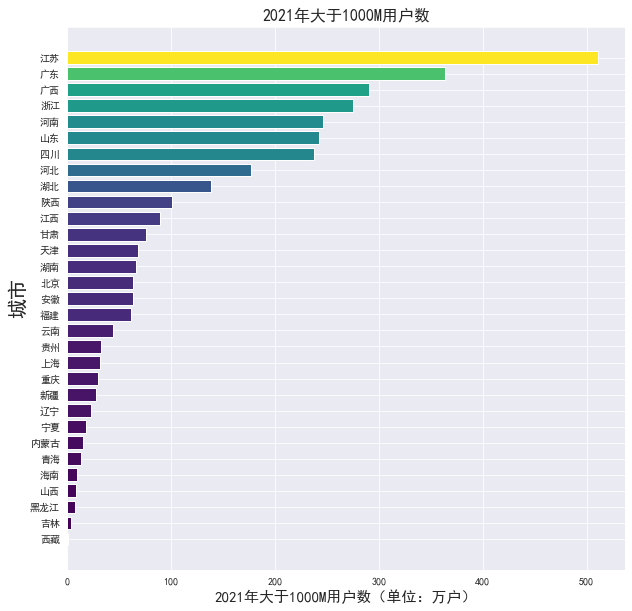

In [123]:
lst = list(data4['大于1000M2021年 '])
lst1 = list(data4['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年大于1000M用户数（单位：万户）', fontdict={'size':15})
plt.title('2021年大于1000M用户数', fontdict={'size':16})
plt.show()

In [161]:
data44 = data.copy()
data44['2021年100M-1000M'] = data44['大于1000M2021年 '] / data44['人口数']
data44 = data44.sort_values(by=['大于1000M2021年 '])
data44

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
22,西藏,115.3,19.0,112.8,19.7,0.003289,21.0,1.2,1.1,78.2,37.2,364.8100
29,吉林,734.2,80.0,689.8,85.0,0.001412,85.3,3.4,3.2,615.1,119.1,2407.3453
30,黑龙江,1013.5,127.2,935.8,111.6,0.002480,126.6,7.9,7.4,830.8,182.7,3185.0088
10,山西,1350.4,98.3,1321.5,95.1,0.002349,139.6,8.2,6.3,1098.4,252.0,3491.5616
9,海南,450.2,98.7,438.9,97.5,0.009324,97.9,9.4,8.1,307.8,142.4,1008.1232
25,青海,209.4,27.4,192.8,22.3,0.023126,14.7,13.7,12.7,152.1,57.2,592.3957
16,内蒙古,796.2,73.3,762.5,73.2,0.006487,53.6,15.6,14.1,701.5,94.7,2404.9155
26,宁夏,317.1,33.5,309.2,33.2,0.025130,15.5,18.1,17.3,246.9,70.2,720.2654
28,辽宁,1464.9,133.7,1416.4,139.2,0.005447,130.5,23.2,21.3,1295.9,169.1,4259.1407
27,新疆,1064.2,180.3,1041.9,184.8,0.010947,172.4,28.3,25.1,761.4,302.8,2585.2345


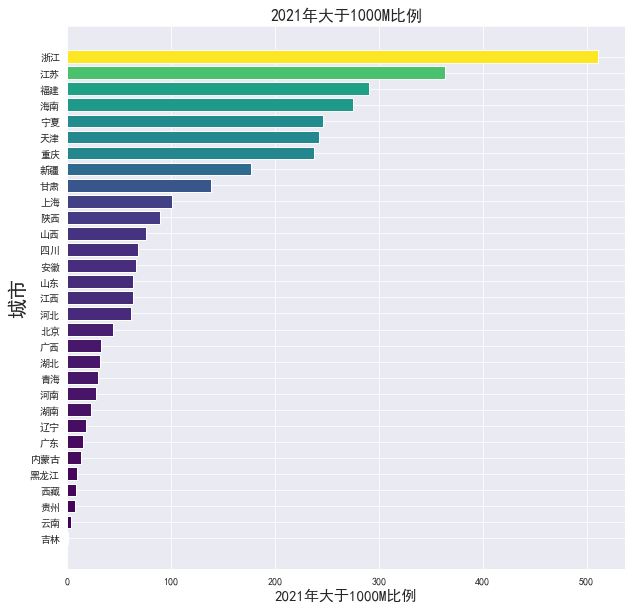

In [162]:
lst = list(data44['大于1000M2021年 '])
lst1 = list(data11['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年大于1000M比例', fontdict={'size':15})
plt.title('2021年大于1000M比例', fontdict={'size':16})
plt.show()

In [124]:
data5 = data.sort_values(by='2021年城市用户').reset_index(drop=True)
data5

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2,364.8100
1,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2,592.3957
2,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2,720.2654
3,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232
4,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
5,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
6,甘肃,1025.2,93.8,993.8,97.0,881.2,39.8,75.9,55.3,661.3,364.0,2501.9831
7,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
8,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
9,新疆,1064.2,180.3,1041.9,184.8,945.9,172.4,28.3,25.1,761.4,302.8,2585.2345


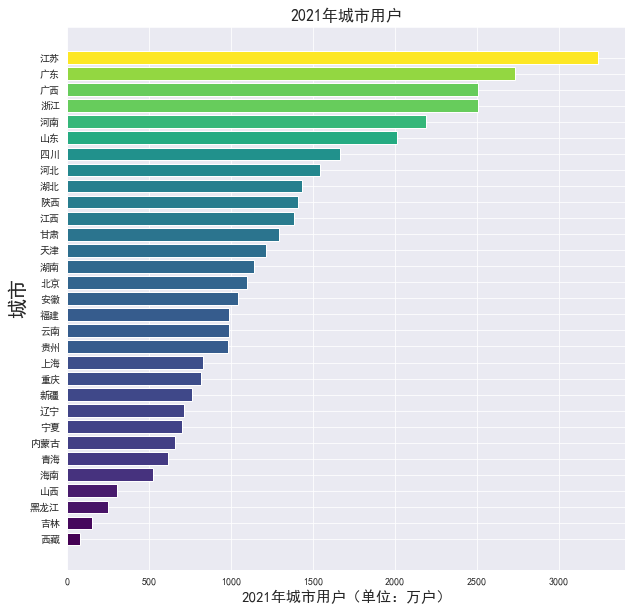

In [125]:
lst = list(data5['2021年城市用户'])
lst1 = list(data4['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年城市用户（单位：万户）', fontdict={'size':15})
plt.title('2021年城市用户', fontdict={'size':16})
plt.show()

In [126]:
data['2021年宽带接入'] = data['2021年宽带接入'] / data['2021年城市用户']
data

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
0,北京,1.130538,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
1,天津,1.113758,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
2,河北,1.680728,262.5,2666.9,303.9,2335.9,130.7,177.2,166.9,1664.1,1132.8,7461.0235
3,上海,1.006878,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895
4,江苏,1.621570,314.8,3767.8,305.3,3220.5,38.9,511.4,394.5,2510.9,1560.7,8474.8016
5,浙江,1.422119,178.2,2838.6,145.7,2621.0,46.0,275.5,219.8,2191.8,925.3,6456.7588
6,福建,1.434528,154.1,1841.4,151.9,1785.6,213.2,62.0,59.9,1383.8,601.4,4154.0086
7,山东,1.412119,418.1,3656.8,454.0,3516.4,334.7,242.1,239.9,2736.1,1127.6,10152.7453
8,广东,1.318772,387.7,3950.0,362.7,3509.2,99.1,364.1,326.4,3243.7,1034.1,12601.2510
9,海南,1.462638,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4,1008.1232


In [127]:
data1 = data.sort_values(by=['2021年宽带接入'])
data1

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年农村用户,人口数
3,上海,1.006878,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9,2487.0895
1,天津,1.113758,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8,1386.6009
28,辽宁,1.130411,133.7,1416.4,139.2,1344.6,130.5,23.2,21.3,1295.9,169.1,4259.1407
0,北京,1.130538,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0,2189.3095
16,内蒙古,1.134996,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7,2404.9155
29,吉林,1.193627,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1,2407.3453
30,黑龙江,1.219909,127.2,935.8,111.6,953.5,126.6,7.9,7.4,830.8,182.7,3185.0088
10,山西,1.229425,98.3,1321.5,95.1,1312.0,139.6,8.2,6.3,1098.4,252.0,3491.5616
26,宁夏,1.284326,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2,720.2654
23,陕西,1.291529,198.4,1439.9,200.2,1378.7,126.3,100.8,93.5,1213.6,353.8,3952.8999


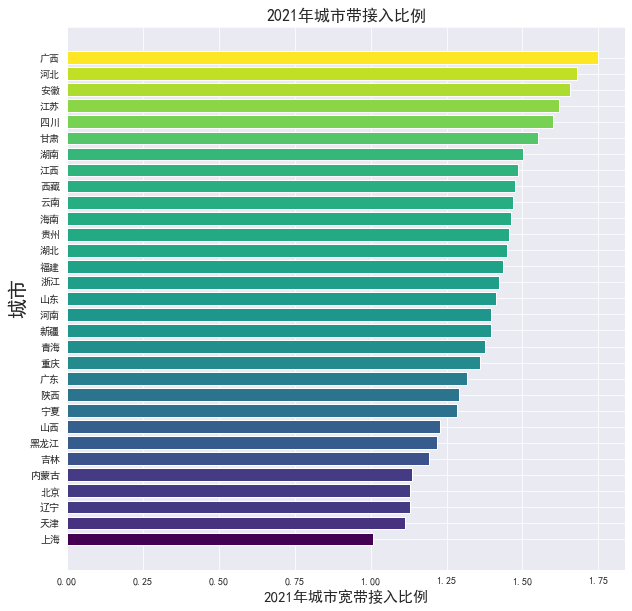

In [128]:
lst = list(data1['2021年宽带接入'])
lst1 = list(data1['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(10, 10))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年城市宽带接入比例', fontdict={'size':15})
plt.title('2021年城市带接入比例', fontdict={'size':16})
plt.show()

在中国，城乡网络连接差距是明显存在的。从该图中，我们可以看到部分省市网络较为平衡，如上海，城乡宽带接入几乎无区别。但是在类似广西、河北这些省城市宽带接入比例将近是乡村两倍。